### 3.4.4 Pre-processing for Treating Outliers
Outliers are the extreme values within the dataset when exploring data. In other words, the outlier data points vary significantly, either much larger or smaller than the expected values. 

For the following data exploration to detect outliers, we will use the dataset that contains pre-processed data after the tasks performed in previous sections, stored in the CSV file ChurnProcessed.csv. 

In [2]:
import pandas as pd

df = pd.read_csv('data/ChurnProcessed.csv')

In Section 4.3, we obtained the following findings regarding the customer churn processed dataset:

- the `MaxTrxValue`, `MinTrxValue`, and `TotalTrxValue` attributes have a skewed distribution that requires treatment. Further exploration is needed to detect if outliers exist.
- the `Age` and `SinceLastTrx` attributes have a normal distribution. Further exploration is needed to detect if outliers exist.
- the rest of the attributes have data that falls within the values or range. No further data exploration is required.

### Detecting Outliers
There are several methods we can use to identify outliers that exist in a numerical attribute. The selection of methods depends on the distribution of the data. We are going to learn the common methods for finding outliers and practically observing the data and outliers using Python codes.

1. For Normal Distributions

In the case of normal distribution, the data points which fall below or above the derived value of the following formula are outliers:

$mean−3∗(standard deviation)$

where the `mean` and the `standard deviation` is the average value of a particular attribute.

The `Python` codes below find the mean and standard deviation for deriving the acceptable values range. The statements with the `#` prefix comment on the respective lines of codes. We apply this method to the `Age` and `SinceLastTrx` attributes since they both have a normal distribution.

In [3]:
#get acceptable range h - l
# find the highest value allowed h
h1 = df['Age'].mean() + 3*df['Age'].std() 
h2 = df['SinceLastTrx'].mean() + 3*df['SinceLastTrx'].std() 

# find the lowest value allowed l
w1 = df['Age'].mean() - 3*df['Age'].std()
w2 = df['SinceLastTrx'].mean() - 3*df['SinceLastTrx'].std()

# get outliers based on the range identified between h and l
df1_outliers = df[(df['Age'] > h1) | (df['Age'] < w1)]
df2_outliers = df[(df['SinceLastTrx'] > h2) | (df['SinceLastTrx'] < w2)]

# find the number of outliers
print('No. of outliers (mean-std) in Age = ', df1_outliers.shape[0]) 
print('No. of outliers (mean-std) in SinceLastTrx = ', df2_outliers.shape[0]) 

No. of outliers (mean-std) in Age =  0
No. of outliers (mean-std) in SinceLastTrx =  0


2. For Skewed Distributions

In the case of skewed distributions, we use Inter-Quartile Range (IQR) proximity rule, in which data points that fall below the `Q1 – 1.5 IQR` or above `Q3 + 1.5 IQR` are outliers. 

Q1 and Q3 are the 25th and 75th percentile of the explored dataset, respectively, and IQR denotes the inter-quartile range of `Q3 – Q1`.

We apply this method to the the `MaxTrxValue`, `MinTrxValue`, and `TotalTrxValue` attributes since they have a skewed distribution.

In [4]:
# find the upper/lower limits for each attribute
pct25_ttl = df['TotalTrxValue'].quantile(0.25) 
pct75_ttl = df['TotalTrxValue'].quantile(0.75) 
pct25_max = df['MaxTrxValue'].quantile(0.25) 
pct75_max = df['MaxTrxValue'].quantile(0.75) 
pct25_min = df['MinTrxValue'].quantile(0.25) 
pct75_min = df['MinTrxValue'].quantile(0.75) 

# calculate the iqr and range for each attribute
iqr_ttl = pct75_ttl - pct25_ttl 
up_ttl = pct75_ttl + 1.5 * iqr_ttl 
low_ttl = pct25_ttl - 1.5 * iqr_ttl 
iqr_max = pct75_max - pct25_max 
up_max = pct75_max + 1.5 * iqr_max 
low_max = pct25_max - 1.5 * iqr_max 
iqr_min = pct75_min - pct25_min 
up_min = pct75_min + 1.5 * iqr_min 
low_min = pct25_min - 1.5 * iqr_min 

# detect and print number of outliers in each attribute
df3_outliers = df[(df['TotalTrxValue'] > up_ttl) | (df['TotalTrxValue'] < low_ttl)] 
print('No. of outliers (IQR) in TotalTrxValue = ', df3_outliers.shape[0]) 
df4_outliers = df[(df['MaxTrxValue'] > up_max) | (df['MaxTrxValue'] < low_max)] 
print('No. of outliers (IQR) in MaxTrxValue = ', df4_outliers.shape[0]) 
df5_outliers = df[(df['MinTrxValue'] > up_min) | (df['MinTrxValue'] < low_min)] 
print('No. of outliers (IQR) in MinTrxValue = ', df5_outliers.shape[0]) 

No. of outliers (IQR) in TotalTrxValue =  24
No. of outliers (IQR) in MaxTrxValue =  23
No. of outliers (IQR) in MinTrxValue =  163


After running the above Python codes, we found that the TotalTrxValue, MaxTrxValue, and MinTrxValue attributes contain outliers.

To further explore these three attributes to gain a clearer picture of their outliers, we can plot a histogram for each of these attributes to observe the data. We use the following example Python codes to plot the charts:

C:\Users\Winnie Ng\AppData\Local\Temp\ipykernel_15356\3034379468.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['MinTrxValue'])
C:\Users\Winnie Ng\AppData\Local\Temp\ipykernel_15356\3034379468.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['MaxTrxValue'])
C:\Users\Winnie Ng\AppDat

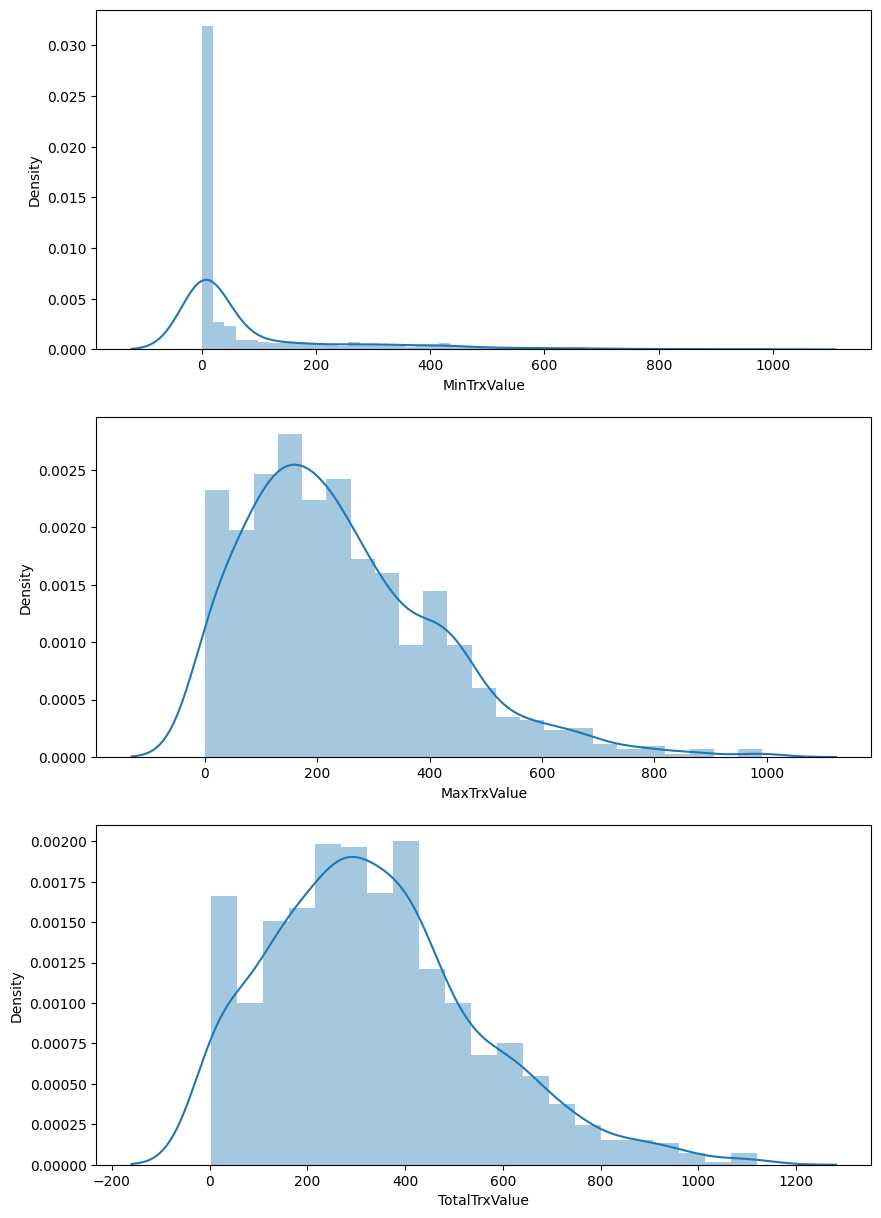

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sb

plt.figure(figsize=(10,15)) # define the plot width and height 

# subplot(x, y, z) where x=rownum, y=colnum, z=plotnum, x(y)must be >=z
plt.subplot(3,1,1) 
sb.distplot(df['MinTrxValue']) 

plt.subplot(3,1,2)  
sb.distplot(df['MaxTrxValue']) 

plt.subplot(3,1,3) 
sb.distplot(df['TotalTrxValue'])   

plt.savefig('img/plot_dist.png')

The `subplot() `function defines the dimension of the plot and the `distplot()` function presents a specific attribute data distribution. 

After running the above codes, observe the content in the `plot_dist.png` file saved in the directory. 

### Treating Outliers
Based on the plots in `plot_dist.png`, we observe that the `TotalTrxValue`, `MaxTrxValue`, and `MinTrxValue` attributes have a wide range of values (i.e., negative to 1000 scaling points). There are several methods to treat outliers. We use the square root transformation for this case study by applying the `numpy.sqrt()` function to the data to reduce the scale while treating the outliers.

Students can try to explore other different methods such as the log transformation to treat outliers. 

The computed values are stored in new attributes with the prefix `“Sqrt”` to derive the square root values of the `TotalTrxValue`, `MaxTrxValue`, and `MinTrxValue` attributes.

In [6]:
import numpy as np

# apply sqrt on attributes that have outliers
df['SqrtTotal'] = np.sqrt(df['TotalTrxValue'])
df['SqrtMax'] = np.sqrt(df['MaxTrxValue'])
df['SqrtMin'] = np.sqrt(df['MinTrxValue'])

After applying the data transformation method, we can observe that the values range has been reduced using the following example codes.

In [7]:
print ('SqrtTotal min/max: ', df['SqrtTotal'].min(), df['SqrtTotal'].max()) 
print ('SqrtMax min/max: ', df['SqrtMax'].min(), df['SqrtMax'].max())
print ('SqrtMin min/max: ', df['SqrtMin'].min(), df['SqrtMin'].max())

SqrtTotal min/max:  1.5748015748023623 33.45773453179399
SqrtMax min/max:  0.938083151964686 31.50015872975881
SqrtMin min/max:  0.0 31.42483094624377


### Saving the Data after Pre-processing
After treating the outliers problem, we save the data and name it `ChurnFinal.csv`. This newly saved dataset contains additional attributes of `SqrtTotal`, `SqrtMax`, and `SqrtMin`.

In [8]:
# save the data into a CSV file 
df.to_csv('data/ChurnFinal.csv')

`We will use the ChurnFinal.csv dataset for future analysis and subsequent phases of the case study`